In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =pd.read_csv ('Groceries_dataset.csv')
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


## Data Understanding

In [4]:
df.shape

(38765, 3)

In [5]:
df.head(20)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


In [6]:
df.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [7]:
df.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [8]:
df.describe

<bound method NDFrame.describe of        Member_number        Date        itemDescription
0               1808  21-07-2015         tropical fruit
1               2552  05-01-2015             whole milk
2               2300  19-09-2015              pip fruit
3               1187  12-12-2015       other vegetables
4               3037  01-02-2015             whole milk
...              ...         ...                    ...
38760           4471  08-10-2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510  03-12-2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food

[38765 rows x 3 columns]>

In [9]:
# checking for  nulls value
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [11]:
df.describe(include= 'all')

,Member_number,Date,itemDescription
count,38765.000000,38765,38765
unique,NaN,728,167
top,NaN,21-01-2015,whole milk
freq,NaN,96,2502
mean,3003.641868,NaN,NaN
std,1153.611031,NaN,NaN
min,1000.000000,NaN,NaN
25%,2002.000000,NaN,NaN
50%,3005.000000,NaN,NaN
75%,4007.000000,NaN,NaN


## Changing Column Datatypes

In [12]:
df['Date']=pd.to_datetime(df['Date'])
df['Member_number']=df['Member_number'].astype('object')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  object        
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 908.7+ KB


C:\Users\LIF2L\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-07-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\LIF2L\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-09-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\LIF2L\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-02-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\LIF2L\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-12-2015' in DD/MM/YYYY format. Provide format or specif

In [13]:
str(df['Date'].dt.date.min()) + '  to  ' +str(df['Date'].dt.date.max()) 



'2014-01-01  to  2015-12-30'

## Checking Duplicates

In [14]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
38760    False
38761    False
38762    False
38763    False
38764    False
Length: 38765, dtype: bool

In [15]:
df.duplicated(keep ='first').sum()

759

In [16]:
df[df.duplicated(keep=False)].sort_values(by='Member_number')

,Member_number,Date,itemDescription
33098,1003,2014-02-27,rolls/buns
37649,1003,2014-02-27,rolls/buns
31248,1005,2014-09-01,rolls/buns
15099,1005,2014-09-01,rolls/buns
7532,1006,2015-06-14,frankfurter
...,...,...,...
7540,4981,2015-10-01,margarine
8109,4988,2015-10-29,rolls/buns
24258,4988,2015-10-29,rolls/buns
38136,4992,2014-02-24,margarine


In [17]:
df[df.duplicated(keep=False)].groupby(['Member_number','Date','itemDescription'],as_index=False).agg(DuplicateCount=('itemDescription','count')).sort_values(by='Member_number') 



,Member_number,Date,itemDescription,DuplicateCount
0,1003,2014-02-27,rolls/buns,2
1,1005,2014-09-01,rolls/buns,2
2,1006,2015-06-14,frankfurter,2
3,1008,2015-07-21,yogurt,2
4,1026,2015-05-28,root vegetables,2
...,...,...,...,...
727,4960,2015-08-19,bottled water,2
728,4968,2014-04-03,beef,2
729,4981,2015-10-01,margarine,3
730,4988,2015-10-29,rolls/buns,2


## Renaming Columns

In [22]:
df.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [25]:
df.rename(columns={'Member_number':'Member_Number','itemDescription':'Item_Description'})

,Member_Number,Date,Item_Description
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk
...,...,...,...
38760,4471,2014-08-10,sliced cheese
38761,2022,2014-02-23,candy
38762,1097,2014-04-16,cake bar
38763,1510,2014-03-12,fruit/vegetable juice


## Number of Products in Dataset

In [26]:
df['itemDescription'].nunique()

167

## Number of Customers

In [28]:
df['Member_number'].nunique()

3898

## Top 10 Products Sold

In [31]:
#Top 10 frequently sold products
print("Top 10 frequently sold products")
x = df['itemDescription'].value_counts().sort_values(ascending=False)[:10]
x



Top 10 frequently sold products


whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

In [35]:
#Bar chart
import plotly.express as px
fig = px.bar(x= x.index, y= x.values)
fig.update_layout(title_text= "Top 10 frequently sold products", xaxis_title= "Products", yaxis_title="Count")
fig.show()



In [36]:
df_date=df.set_index(['Date']) ## Setting date as index for plotting purpose
df_date

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk
...,...,...
2014-08-10,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


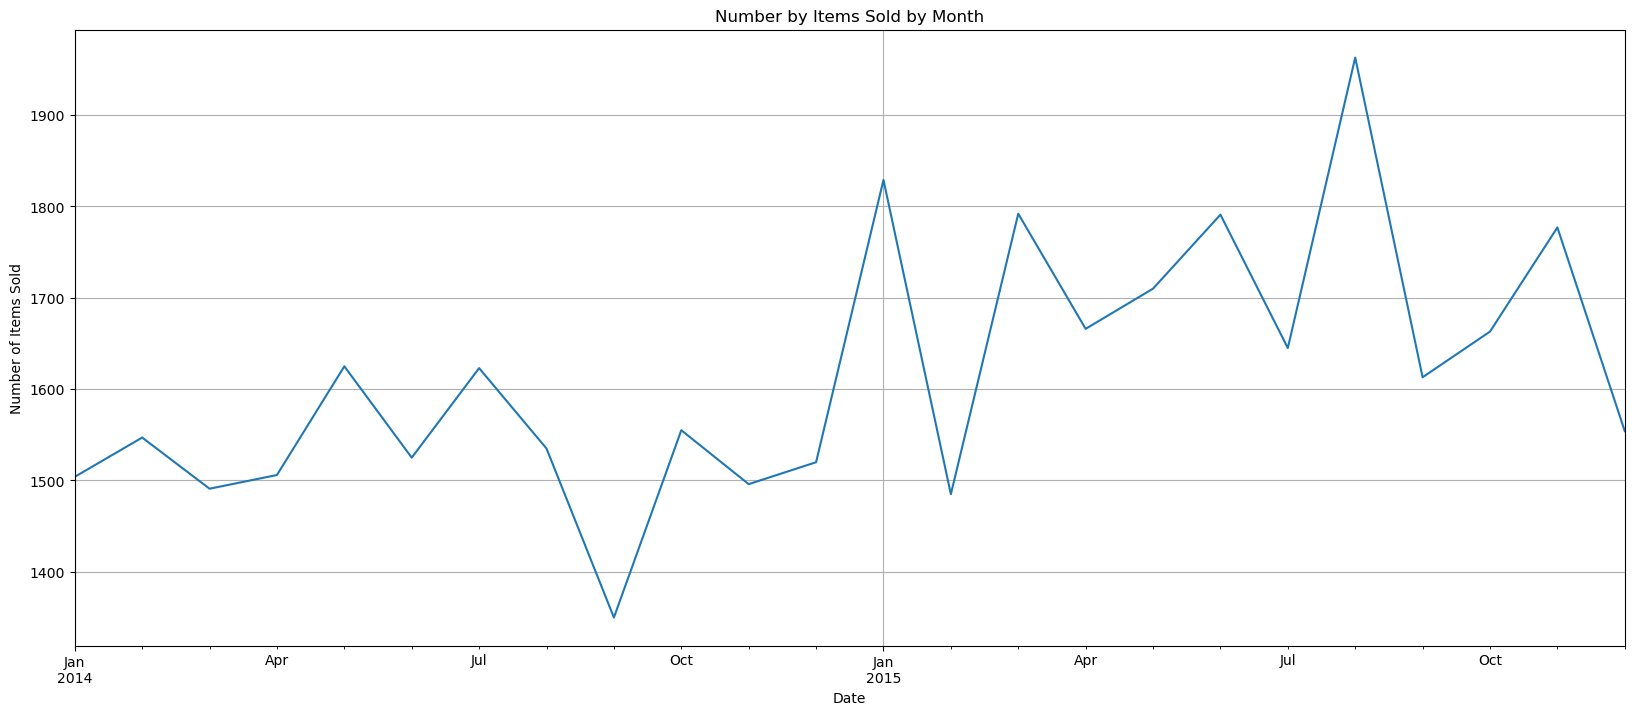

In [37]:
df_date= df_date.resample("M")['itemDescription'].count().plot(figsize = (20,8), grid = True, title = "Number by Items Sold by Month").set(xlabel = "Date", ylabel = "Number of Items Sold")

In [43]:
pip install calplot

     ------------------------------------ 132.3/132.3 kB 709.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for calplot: filename=calplot-0.1.7.5-py3-none-any.whl size=8117 sha256=d4943fbcbe9797c232e67c74f2cfb50e0cd7862c4d05a41cc6066ce70d728c53
  Stored in directory: c:\users\lif2l\appdata\local\pip\cache\wheels\a4\51\68\89dbd39aa6abbe8e34f410a810421335b157fb162b99841c30
Successfully built calplot
Note: you may need to restart the kernel to use updated packages.


In [44]:
import calplot
import warnings
warnings.filterwarnings('ignore')

In [47]:
# Extracting data for grocery items sold in 2015
df2015 = df[pd.DatetimeIndex(df['Date']).year==2015].\
groupby(['Date']).size().reset_index(name='count').sort_values('Date',ascending=True)
df2015

,Date,count
0,2015-01-01,48
1,2015-01-02,61
2,2015-01-03,76
3,2015-01-04,83
4,2015-01-05,68
...,...,...
359,2015-12-26,37
360,2015-12-27,74
361,2015-12-28,58
362,2015-12-29,57


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


<Figure size 1500x1000 with 0 Axes>

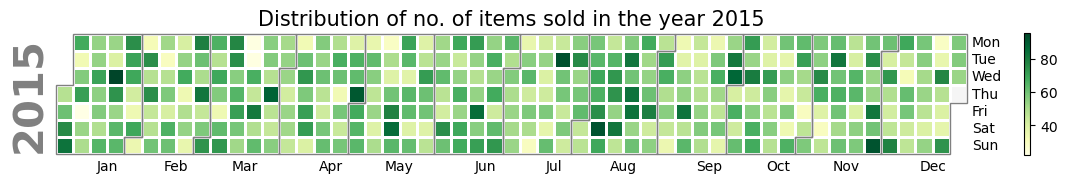

In [48]:
# Visualizing the number of distribution of grocery items sold in 2015
plt.figure(figsize=(15,10))
df2015['Date'] = pd.DatetimeIndex(df2015['Date'])
df2015.set_index("Date", inplace = True,drop = True)
events = df2015["count"]
calplot.calplot(events,cmap='YlGn')
plt.title('Distribution of no. of items sold in the year 2015',fontsize=15)
plt.show()

In [49]:
# Extracting data for grocery items sold in 2014
df2014 = df[pd.DatetimeIndex(df['Date']).year==2014].\
groupby(['Date']).size().reset_index(name='count').sort_values('Date',ascending=True)
df2014

,Date,count
0,2014-01-01,48
1,2014-01-02,62
2,2014-01-03,54
3,2014-01-04,64
4,2014-01-05,44
...,...,...
359,2014-12-26,62
360,2014-12-27,40
361,2014-12-28,39
362,2014-12-29,48


<Figure size 1500x1000 with 0 Axes>

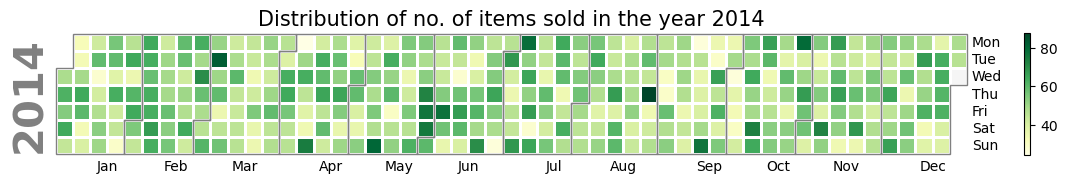

In [50]:
# Visualizing the number of distribution of grocery items sold in 2014
plt.figure(figsize=(15,10))
df2014['Date'] = pd.DatetimeIndex(df2014['Date'])
df2014.set_index("Date", inplace = True,drop = True)
events = df2014["count"]
calplot.calplot(events,cmap='YlGn')
plt.title('Distribution of no. of items sold in the year 2014',fontsize=15)
plt.show()



In [51]:
df = df.groupby(['itemDescription']).size().reset_index(name='count')

In [52]:
# Visualizing the distribution of items sold during 2014-15
df.loc[df['count'] < 500, 'itemDescription'] = 'Other items'
fig = px.pie(df, values='count',names = 'itemDescription',title='Distribution of items sold during 2014-15')
fig.show()

